# <center> FP2–V2. Mjerenje viskoznosti viskozimetrom s padajućom kuglicom
## <center> Matija Pajas

In [1]:
from scipy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#from sympy import *
#init_printing()

from IPython.display import HTML
from IPython.display import display

## Zadatak 1

Odredite viskoznost metanola kao funkcije temperature, u koracima od $5 \ \mathrm{^\circ C}$, koristeći se formulom (8).
Potrebni podaci su:
- gustoća kuglice $\rho_\mathrm{k} = 2218 \ \mathrm{kg/m^3}$
- gustoća metanola $\rho_\mathrm{meth} = 792 \ \mathrm{kg/m^3}$
- konstanta $K = (5,78 \pm 0,01) \times 10^{−8} \ \mathrm{Pa \ m^3/kg}$

Nacrtajte funkciju $\eta(T)$ za metanol

Za ovaj zadatak bilo je potrebno izvršiti po barem 5 mjerenja na konstantnim temperaturama u razmacima od barem $5 \ \mathrm{^\circ C}$. Mjeri se vrijeme koje je potrebno kuglici koja se nalazi u cijevi sa metanolom da padne za unaprijed određeni razmak označen na instrumentu, viskozmetru, kojemu proizvođač određuje podatke potrebne za izračun viskoznosti prema idućem izrazu:

$$\eta=K(\rho_\mathrm{K}-\rho_\mathrm{meth})t$$

U tablici niže mogu se pronaći mjerenja za 7 različitih temperatura te graf ovisnosti viskoznosti temperature, kao i tablica izračunatih srednjih vrijednosti i nepouzdanosti vremena i viskoznosti. Nepouzdanost viskoznosti izračunata je idućom relacijom:

$$M_\eta=\sqrt{ \left ( \frac{\partial \eta}{\partial K}M_K  \right )^2+
\left (  \frac{\partial \eta}{\partial t}M_t  \right )^2
}=\eta \cdot \sqrt{ \left ( \frac{M_K}{K}  \right )^2+
\left (   \frac{M_t}{t}  \right )^2}$$

In [2]:
K = 5.78*(10**(-8))
Mk = 0.01*(10**(-8))
rho_kugla = 2218
rho_meth = 792

def eta(K,rk,rx,t):
    return K*(rk-rx)*t

def Meta(e,K,t,Mk,Mt):
    return e*np.sqrt( (Mk/K)**2 + (Mt/t)**2 )

In [48]:
t1 = [13.11, 12.74, 12.34, 12.15, 12.56]
t2 = [11.4, 11.25, 11.5, 11.15, 11.48]
t3 = [10.83, 10.53, 10.78, 10.67, 10.60]
t4 = [10.08, 10.02, 10.34, 9.86, 9.98]
t5 = [9.68, 9.59, 9.83, 9.5, 9.53]
t6 = [9.21, 8.91, 9.3, 9.43, 9.15]
t7 = [9.28, 8.84, 9.00, 8.58, 8.69]
T = [23, 28, 33, 38, 44, 50, 55]

for i in range(size(T)):
    T[i] = T[i] + 273.15

d = {"$t_1$ / $\mathrm{s}$": t1,
     "$t_2$ / $\mathrm{s}$": t2,
     "$t_3$ / $\mathrm{s}$": t3,
     "$t_4$ / $\mathrm{s}$": t4,
     "$t_5$ / $\mathrm{s}$": t5,
     "$t_6$ / $\mathrm{s}$": t6,
     "$t_7$ / $\mathrm{s}$": t7}

df = pd.DataFrame(data=d,index=range(1,size(t1)+1))
df
df_T = pd.DataFrame(data=[T], index = ["T"], columns=["$t_1$ / $\mathrm{s}$","$t_2$ / $\mathrm{s}$","$t_3$ / $\mathrm{s}$",
                                                     "$t_4$ / $\mathrm{s}$","$t_5$ / $\mathrm{s}$","$t_6$ / $\mathrm{s}$",
                                                     "$t_7$ / $\mathrm{s}$"])
df_T
df_merged = df.merge(df_T, how="outer")

as_list = df_merged.index.tolist()
idx = as_list.index(5)
as_list[idx] = "$T$ / $\mathrm{K}$"
df_merged.index = as_list
#df_merged
#dftohtml = df_merged.to_html(col_space=12,decimal=",")
#print(dftohtml)

### Tablica podataka
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$t_1$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$t_2$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$t_3$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$t_4$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$t_5$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$t_6$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$t_7$ / $\mathrm{s}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">0</th>
      <td>13,11</td>
      <td>11,40</td>
      <td>10,83</td>
      <td>10,08</td>
      <td>9,68</td>
      <td>9,21</td>
      <td>9,28</td>
    </tr>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>12,74</td>
      <td>11,25</td>
      <td>10,53</td>
      <td>10,02</td>
      <td>9,59</td>
      <td>8,91</td>
      <td>8,84</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>12,34</td>
      <td>11,50</td>
      <td>10,78</td>
      <td>10,34</td>
      <td>9,83</td>
      <td>9,30</td>
      <td>9,00</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>12,15</td>
      <td>11,15</td>
      <td>10,67</td>
      <td>9,86</td>
      <td>9,50</td>
      <td>9,43</td>
      <td>8,58</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>12,56</td>
      <td>11,48</td>
      <td>10,60</td>
      <td>9,98</td>
      <td>9,53</td>
      <td>9,15</td>
      <td>8,69</td>
    </tr>
    <tr>
      <th bgcolor="#5D7B9D" style="min-width: 12;">$T$ / $\mathrm{K}$</th>
      <td bgcolor="#5D7B9D">296,15</td>
      <td bgcolor="#5D7B9D">301,15</td>
      <td bgcolor="#5D7B9D">306,15</td>
      <td bgcolor="#5D7B9D">311,15</td>
      <td bgcolor="#5D7B9D">317,15</td>
      <td bgcolor="#5D7B9D">323,15</td>
      <td bgcolor="#5D7B9D">328,15</td>
    </tr>
  </tbody>
</table>

In [49]:
means = df.mean(0)
devs = df.std(0) 
uncs = devs/sqrt(df.index.size)
print(df.index.size)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Rezultat"])
df2 = pd.DataFrame(data=[[(means[i]) for i in range(len(means))],[(uncs[i]) for i in range(len(uncs))]], index=["Srednja vrijednost","Nepouzdanost"], columns=list(means.keys()))
#df2

5


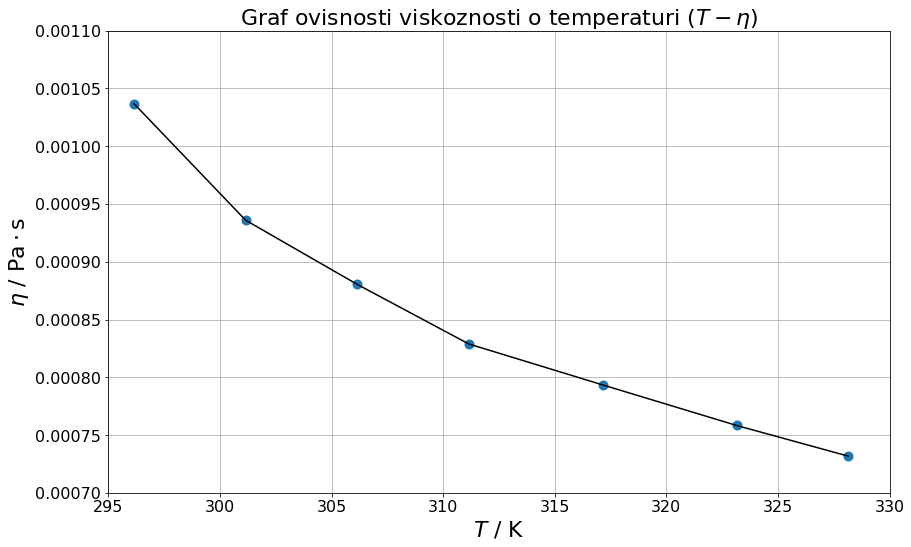

In [57]:
etas = []

for i in range(7):
    s = "$t_" + str(i+1) + "$ / $\mathrm{s}$"
    etas.append(eta(K,rho_kugla,rho_meth,df2[s][0]))
    
#plt.plot(T,etas,color="black")
#plt.scatter(T,etas, color="red")
#plt
#print(etas)

K = 5.78*(10**(-8))
Mk = 0.01*(10**(-8))
rho_kugla = 2218
rho_meth = 792

Metas = []
for i in range(size(etas)):
    s = "$t_" + str(i+1) + "$ / $\mathrm{s}$"
    t = df2[s][0]
    Mt = df2[s][1]
    Metas.append(Meta(etas[i],K,t,Mk,Mt))
    
#for x,y in zip(etas,Metas):
#    print(x,"±",y)

plt.figure(figsize=(14,8.5))

plt.scatter(T,etas,linewidth=4)
plt.plot(T,etas, color="black")
plt.grid()
plt.xlim(295,330)
plt.ylim(0.0007,0.0011)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title(r"Graf ovisnosti viskoznosti o temperaturi ($T - \eta$)", fontsize=22)
plt.xlabel(r"$T$ / $\mathrm{K}$",fontsize=22)
plt.ylabel(r"$\eta$ / $\mathrm{Pa \cdot s}$",fontsize=22);

In [59]:
t_sr = [12.580000,11.35600,10.682000,10.056000,9.626000,9.200000,8.878000]
Mt = [0.165741,0.06772,0.055444,0.079599,0.059548,0.086487,0.122898]
eta_sr = etas
etat = Metas

d = {"$\overline{t}$ / $\mathrm{s}$": t_sr,
     "$M_t$ / $\mathrm{s}$": Mt,
     "$\eta$ / $\mathrm{Pa \cdot s}$": eta_sr,
     "$M_\eta$ / $\mathrm{Pa \cdot s}$": etat}

df3 = pd.DataFrame(data=d,index=range(1,size(t_sr)+1))
#df3
#dftohtml = df3.to_html(col_space=12,decimal=",")
#print(dftohtml)

### Tablica rezultata
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$\overline{t}$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$M_t$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$\eta$ / $\mathrm{Pa \cdot s}$</th>
      <th style="min-width: 12;">$M_\eta$ / $\mathrm{Pa \cdot s}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>12,580</td>
      <td>0,165741</td>
      <td>0,001037</td>
      <td>0,000014</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>11,356</td>
      <td>0,067720</td>
      <td>0,000936</td>
      <td>0,000006</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>10,682</td>
      <td>0,055444</td>
      <td>0,000880</td>
      <td>0,000005</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>10,056</td>
      <td>0,079599</td>
      <td>0,000829</td>
      <td>0,000007</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>9,626</td>
      <td>0,059548</td>
      <td>0,000793</td>
      <td>0,000005</td>
    </tr>
    <tr>
      <th style="min-width: 12;">6</th>
      <td>9,200</td>
      <td>0,086487</td>
      <td>0,000758</td>
      <td>0,000007</td>
    </tr>
    <tr>
      <th style="min-width: 12;">7</th>
      <td>8,878</td>
      <td>0,122898</td>
      <td>0,000732</td>
      <td>0,000010</td>
    </tr>
  </tbody>
</table>

## Rezultati

$$\eta_1 = ( 1,04 \pm 0,01 ) \ \mathrm{mPa \cdot s}$$

$$\eta_2 = ( 0,936 \pm 0,006 ) \ \mathrm{mPa \cdot s}$$

$$\eta_3 = ( 0,880 \pm 0,005 ) \ \mathrm{mPa \cdot s}$$

$$\eta_4 = ( 0,829 \pm 0,007 ) \ \mathrm{mPa \cdot s}$$

$$\eta_5 = ( 0,793 \pm 0,005 ) \ \mathrm{mPa \cdot s}$$

$$\eta_6 = ( 0,758 \pm 0,007 ) \ \mathrm{mPa \cdot s}$$

$$\eta_7 = ( 0,73 \pm 0,01 ) \ \mathrm{mPa \cdot s}$$


## Zadatak 2

Odredite viskoznost vakuumskog ulja pri sobnoj temperaturi i pri $45 \ \mathrm{^\circ C}$. Potrebni podaci su:
- gustoća kuglice $\rho_\mathrm{k} = 2218 \ \mathrm{kg/m^3}$
- gustoća vakuumskog ulja $\rho_\mathrm{ulje} = 860 \ \mathrm{kg/m^3}$
- konstanta $K = (7,79 \pm 0,03) \times 10^{−7} \ \mathrm{Pa \ m^3/kg}$

Postupak mjerenja identičan je kao u prvom zadatku samo što je u pitanju vakuumsko ulje te različita konstanta $K$ za korištenje relacije $\eta=K(\rho_\mathrm{K}-\rho_\mathrm{meth})t$.

In [30]:
K = 7.79*(10**(-7))
rho_kugla = 2218
rho_ulje = 860

In [61]:
t1 = [58.17, 56.04, 55.37, 58.64, 59.13]
t2 = [19.16, 18.96, 16.54, 17.72, 20.34]

for i in range(size(t1)):
    t1[i] = 2*t1[i]
    t2[i] = 2*t2[i]

T = [22, 44]

for i in range(size(T)):
    T[i] = T[i] + 273.15

d = {"$t_1$ / $\mathrm{s}$": t1,
     "$t_2$ / $\mathrm{s}$": t2}

df = pd.DataFrame(data=d,index=range(1,size(t1)+1))
df.loc[6] = T

as_list = df.index.tolist()
idx = as_list.index(6)
as_list[idx] = "$T$ / $\mathrm{K}$"
df.index = as_list
#df
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)

## Tablica podataka

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$t_1$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$t_2$ / $\mathrm{s}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>116,34</td>
      <td>38,32</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>112,08</td>
      <td>37,92</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>110,74</td>
      <td>33,08</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>117,28</td>
      <td>35,44</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>118,26</td>
      <td>40,68</td>
    </tr>
    <tr>
      <th bgcolor="#5D7B9D" style="min-width: 12;">$T$ / $\mathrm{K}$</th>
      <td bgcolor="#5D7B9D">295,15</td>
      <td bgcolor="#5D7B9D">317,15</td>
    </tr>
  </tbody>
</table>

bgcolor="#5D7B9D"

In [63]:
means = df.mean(0)
devs = df.std(0) 
uncs = devs/sqrt(df.index.size)
print(df.index.size)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Rezultat"])
df2 = pd.DataFrame(data=[[(means[i]) for i in range(len(means))],[(uncs[i]) for i in range(len(uncs))]], index=["Srednja vrijednost","Nepouzdanost"], columns=list(means.keys()))
df2

6


,$t_1$ / $\mathrm{s}$,$t_2$ / $\mathrm{s}$
Srednja vrijednost,144.97500,83.7650
Nepouzdanost,30.05956,46.6891


In [64]:
etas = []

for i in range(2):
    s = "$t_" + str(i+1) + "$ / $\mathrm{s}$"
    etas.append(eta(K,rho_kugla,rho_ulje,df2[s][0]))
    
#plt.plot(T,etas,color="black")
#plt.scatter(T,etas, color="red")
#print(etas)

K = 7.79*(10**(-7))
Mk = 0.03*(10**(-7))
rho_kugla = 2218
rho_ulje = 860


Metas = []
for i in range(size(etas)):
    s = "$t_" + str(i+1) + "$ / $\mathrm{s}$"
    t = df2[s][0]
    Mt = df2[s][1]
    Metas.append(Meta(etas[i],K,t,Mk,Mt))
    
for x,y in zip(etas,Metas):
    print(x,"±",y)

0.01137943569 ± 0.002359853945148187
0.0065749158860000005 ± 0.003664827001381684


In [67]:
t_sr = [114.940000, 37.088000]
Mt = [1.487911, 1.301777]
eta_sr = etas
etat = Metas

d = {"$\overline{t}$ / $\mathrm{s}$": t_sr,
     "$M_t$ / $\mathrm{s}$": Mt,
     "$\eta$ / $\mathrm{Pa \cdot s}$": eta_sr,
     "$M_\eta$ / $\mathrm{Pa \cdot s}$": etat}

df3 = pd.DataFrame(data=d,index=range(1,size(t_sr)+1))
#df3
#dftohtml = df3.to_html(col_space=12,decimal=",")
#print(dftohtml)

## Tablica rezultata
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$\overline{t}$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$M_t$ / $\mathrm{s}$</th>
      <th style="min-width: 12;">$\eta$ / $\mathrm{Pa \cdot s}$</th>
      <th style="min-width: 12;">$M_\eta$ / $\mathrm{Pa \cdot s}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>114,940</td>
      <td>1,487911</td>
      <td>0,011379</td>
      <td>0,002360</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>37,088</td>
      <td>1,301777</td>
      <td>0,006575</td>
      <td>0,003665</td>
    </tr>
  </tbody>
</table>

## Rezultati

$$\eta_1 = ( 121,593 \pm 2 ) \ \mathrm{mPa \cdot s}$$

$$\eta_2 = ( 39,235 \pm 1 ) \ \mathrm{mPa \cdot s}$$

## Zadatak 3

Prikažite rezultate za metanol u grafu $\frac{1}{T} − \log\eta$ i provjerite valjanost relacije (2). Potrebno je upotrebljavati skalu apsolutne temperature. Odredite aktivacijsku energiju $\mu$ za metanol.

Kako bi se odredila aktivacijska energija $\mu$ potrebno je linearizirati idući izraz:

$$\eta(T)=Ae^{\frac{B}{T}}$$

koji će nakon toga izgledati ovako

$$\ln(\eta)=B \left ( \frac{1}{T} \right )+ \ln(A)$$

Taj izraz prepoznajemo kao jednadžbu pravca $y = ax + b$ te pripadne veličine:
$$y = \ln(\eta)$$

$$x = \frac{1}{T}$$

$$a = B$$

$$b = \ln(A)$$

Nepouzdanost od $B$ biti će upravo jednaka parametru a:

$$B=a \\
M_{B}=\sqrt{\left ( \frac{\partial B}{\partial a} M_{a}\right )^2}=
\sqrt{\left ( M_{a}\right )^2}=\left | M_{a} \right |$$

te kako bi se izračunala aktivacijka energija $\mu=k_\mathrm{B}B$ potrebno je pronaći i nepouzdanost ovisnih veličina:

$$M_\mu=\sqrt{ \left ( \frac{\partial \mu}{\partial B} M_B \right )^2
}= \mu \cdot \frac{M_B}{B}$$

Sada su svi potrebni izrazi spremni te možemo krenuti sa MNK.

Transformirani podaci nad kojima se provodi MNK su u tablici niže kao i vizualni prikaz.

In [69]:
Y = [0.0010368788240000002, 0.0009359933168000001, 
     0.0008804403496000001, 0.0008288436768000002, 
     0.0007934018728000001, 0.00075828976, 0.0007317496183999999]

for i in range(size(Y)):
    Y[i] = log(Y[i])
T = [296.15, 301.15, 306.15, 311.15, 317.15, 323.15, 328.15]

for i in range(size(T)):
    T[i] = 1/T[i]

In [73]:
d = {"$1/T$ / $\mathrm{K^{-1}}$": T,
     "$\ln(\eta)$": Y}

df = pd.DataFrame(data=d,index=range(1,size(T)+1))
#df
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)

## Tablica prilagođenih podataka za MNK
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$1/T$ / $\mathrm{K^{-1}}$</th>
      <th style="min-width: 12;">$\ln(\eta)$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>0,003377</td>
      <td>-6,871540</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>0,003321</td>
      <td>-6,973902</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>0,003266</td>
      <td>-7,035088</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>0,003214</td>
      <td>-7,095479</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>0,003153</td>
      <td>-7,139181</td>
    </tr>
    <tr>
      <th style="min-width: 12;">6</th>
      <td>0,003095</td>
      <td>-7,184445</td>
    </tr>
    <tr>
      <th style="min-width: 12;">7</th>
      <td>0,003047</td>
      <td>-7,220072</td>
    </tr>
  </tbody>
</table>

In [76]:
pars,cov=curve_fit(lambda x,a,b: a*x+b ,T,Y)

a=pars[0]
b=pars[1]

x_fit=linspace(0.002,0.004)
y_fit=a*x_fit+b

print("a =", pars[0],"±", sqrt(cov[0,0]))
print("b =",pars[1],"±", sqrt(cov[1,1]));
"""
plt.figure(figsize=(14,8.5))
plt.scatter(T,Y,linewidth=4)
plt.grid()
plt.plot(x_fit,y_fit,color="red",linestyle="--")
plt.xlim(0.003,0.0034)
plt.ylim(-7.35,-6.8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title(r"Graf ovisnosti $1/T - \ln(\eta)$", fontsize=22)
plt.xlabel(r"$1/T$ / $\mathrm{K^{-1}}$",fontsize=22)
plt.ylabel(r"$\ln(\eta)$",fontsize=22);"""

a = 1010.7093963508239 ± 79.05631475956311
b = -10.318987185893898 ± 0.25395101276234794


'\nplt.figure(figsize=(14,8.5))\nplt.scatter(T,Y,linewidth=4)\nplt.grid()\nplt.plot(x_fit,y_fit,color="red",linestyle="--")\nplt.xlim(0.003,0.0034)\nplt.ylim(-7.35,-6.8)\nplt.xticks(fontsize=16)\nplt.yticks(fontsize=16)\n\nplt.title(r"Graf ovisnosti $1/T - \\ln(\\eta)$", fontsize=22)\nplt.xlabel(r"$1/T$ / $\\mathrm{K^{-1}}$",fontsize=22)\nplt.ylabel(r"$\\ln(\\eta)$",fontsize=22);'

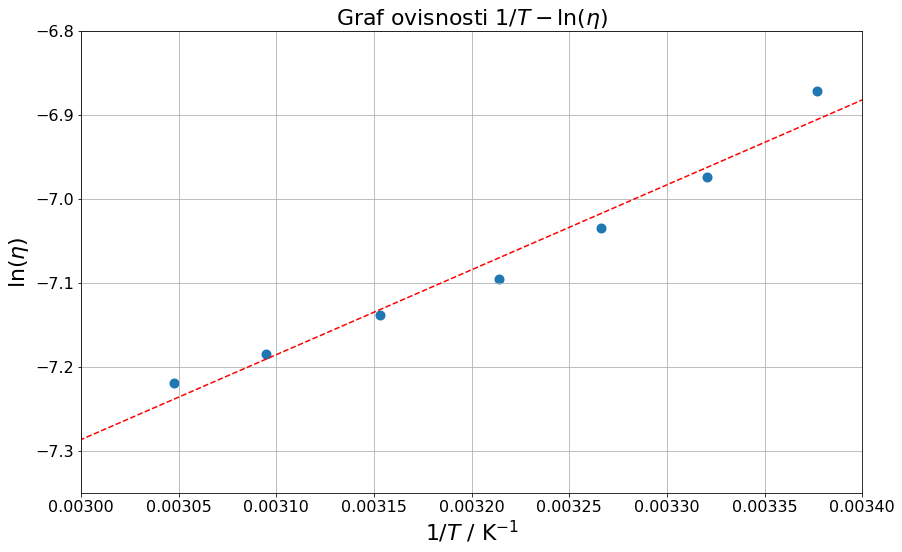

## Rezultati MNK

$a = 1010.7093963508239 ± 79.05631475956311$

$b = -10.318987185893898 ± 0.25395101276234794$

$$a = 1010 ± 79$$

$$b = -10.3 ± 0.3$$

In [25]:
kb = 1.381*(10**(-23))
B = a
mu = kb*B
print(mu)
Mut = mu*(sqrt(cov[0,0])/B)
print(Mut)

1.3957896763604878e-20
1.0917677068295665e-21


## Rezultat

$\mu = (1,3957896763604878 \pm 0,10917677068295665) \times 10^{-20} \ \mathrm{J}$

$$\mu = (1,4 \pm 0,1) \times 10^{-20} \ \mathrm{J}$$